In [68]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [69]:
print(pd.__version__)

1.4.1


## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [70]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [71]:
carpeta="data/Only_training_hipotesis_salida/"

In [80]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/Only_training_hipotesis_salida/pTEST_new_0.2_9.csv.pickle'

In [81]:
dasdas =pd.read_pickle(a[0])
dasdas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, little{little,ADJ...","[NULL{null,PROPN}, the{the,DET}, girl{girl,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.17582855, 0.0051...","[0.73986155, 0.21198581, 0.048152573]","[1.0, 0.0, 0.0]",0,6801,entailment,entailment,...,entailment_entailment
1,1,"[NULL{null,ADJ}, people{people,NOUN}, landscap...","[NULL{null,ADJ}, people{people,NOUN}, are{be,V...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.16620766, 0.011193112, 0.1601...","[0.089671984, 0.9036437, 0.0066843526]","[1.0, 0.0, 0.0]",0,9663,neutral,entailment,NOUN VERB ADV AD...,entailment_neutral
2,2,"[NULL{null,ADJ}, man{man,NOUN}, with{with,ADP}...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.00511...","[0.5843813, 0.3592317, 0.05638696]","[0.0, 1.0, 0.0]",0,1216,entailment,neutral,...,neutral_entailment
3,3,"[NULL{null,ADJ}, two{two,NUM}, females{female,...","[NULL{null,ADJ}, people{people,NOUN}, are{be,V...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.16620766, 0.011193112, 0.0352...","[0.75636595, 0.20552766, 0.038106415]","[1.0, 0.0, 0.0]",0,5572,entailment,entailment,...,entailment_entailment
4,4,"[NULL{null,ADJ}, man{man,NOUN}, with{with,ADP}...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.02319...","[0.012069525, 0.010695389, 0.977235]","[0.0, 0.0, 1.0]",0,1541,contradiction,contradiction,...,contradiction_contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,2721,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, few{few,ADJ}, coo...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.13514067, 0.1475...","[0.0367556, 0.9514451, 0.011799323]","[0.0, 1.0, 0.0]",1,9789,neutral,neutral,...,neutral_neutral
2722,2722,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,INTJ}, no{no,DET}, one{one,NOUN}, i...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.5133731, 0.103053674, 0.01616...","[0.0011920021, 0.0025028302, 0.9963052]","[0.0, 0.0, 1.0]",1,9792,contradiction,contradiction,"NOUN VERB ADV ADJ NOUN ,1.236715 ...",contradiction_contradiction
2723,2723,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, one{one,NOUN}, with{with,ADP}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.0051167835, 0.23...","[0.8575601, 0.049335785, 0.09310413]","[1.0, 0.0, 0.0]",1,9808,entailment,entailment,...,entailment_entailment
2724,2724,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,ADJ}, two{two,NUM}, girls{girl,NOUN...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21120092, 0.01119...","[0.7249473, 0.22226317, 0.052789494]","[1.0, 0.0, 0.0]",1,9814,entailment,entailment,NOUN V...,entailment_entailment


In [74]:
stats.zscore([[1,2,3,4],[4,3,2,1]])

array([[-1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.]])

# Procesamiento de todos los resultados para calcular la entropia de los alineamientos

In [75]:
etiquetas=['entailment','neutral','contradiction']

In [144]:
def entropia_f(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    lista_val=list(X)
    l=len(X)
    probs = [lista_val.count(valor)/l for valor in set(X)]
    #probs = [np.mean(X == valor) for valor in set(X)]
    print(probs)
    return round(sum(-p * np.log2(p) for p in probs), 3)

In [146]:
fprueba=np.random.normal(0,1,20)
ent_max = np.random.uniform(np.min(fprueba),np.max(fprueba),len(fprueba))
#print(ent_max)
x=entropia_f(fprueba)
y=entropia_f(ent_max)

print(x,y,'\n---------\n',x/y)

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
4.322 4.322 
---------
 1.0


In [120]:
for valor in fprueba:
    #print(fprueba)
    print(fprueba.where(fprueba == valor))

AttributeError: 'list' object has no attribute 'where'

In [84]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'entropia' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_entropia=[]
                for index,strings in temp.iterrows():
                    t=strings[1]
                    h=strings[2]
                    matriz=strings[5]
                    matriz_c=matriz[1:len(t)-1,1:len(h)-1]
                    #uno de los cambios fue para que la entropia fuera más adecuada redondeamos a dos decimales
                    #Se usa la transpuesta por que queremos analizar los tokens de la hipotesis
                    l_entropia.append(entropia_f(stats.zscore(np.round(matriz_c.T, decimals = 2)).flatten()))
                new_data['entropia'].append(np.array(l_entropia[:]))
                new_data['Paraphrase'].append(i)
                l_entropia.clear()
dfn=pd.DataFrame(new_data)

/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/tmp/ipykernel_137714/1332641115.py:8: RuntimeWarning: divide by zero encountered in log2
  return round(sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_137714/1332641115.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return round(sum(-p * np.log2(p) for p in probs), 3)
/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/tmp/ipykernel_137714/1332641115.py:8: RuntimeWarning: divide by zero encountered in log2
  return round(sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_137714/1332641115.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return round(sum(-p * np.log2(p) for p in probs), 3)
/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning

In [85]:
dfn.to_pickle(carpeta+"entropia/resultados_entropiaZSCORE_TransponseENTROPIA_check.pickle")

In [11]:
dfn.to_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [12]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [86]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,375,entailment_entailment,"[5.94, 6.091, 5.977, 5.14, 4.5, 7.294, 5.934, ...",0
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,45,entailment_neutral,"[4.925, 5.697, 6.468, 6.644, 5.838, 5.648, 6.3...",0
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,10,entailment_contradiction,"[6.484, 5.418, 5.457, 6.263, 6.562, 6.208, 6.4...",0
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,497,46,neutral_entailment,"[4.845, 6.267, 5.742, 5.17, 6.348, 7.136, 4.69...",0
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,497,408,neutral_neutral,"[5.258, 6.841, 6.229, 7.499, 7.28, 6.21, 6.22,...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1183,923,neutral_neutral,"[6.203, 6.503, 5.247, 5.719, 6.26, 4.107, 4.83...",1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1183,127,neutral_contradiction,"[6.366, 6.515, 6.774, 4.964, 6.336, 5.715, 6.1...",1
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1149,66,contradiction_entailment,"[5.64, 5.447, 4.564, 6.107, 6.587, 5.447, 6.21...",1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1149,149,contradiction_neutral,"[5.213, 5.918, 5.273, 7.148, 6.759, 6.395, 5.2...",1


In [87]:
len(dfn['grupo'].unique())

7

In [88]:
dfn['entropia'][0]

array([5.94 , 6.091, 5.977, 5.14 , 4.5  , 7.294, 5.934, 4.564, 6.451,
       5.804, 6.497, 5.817, 5.46 , 5.492, 6.522, 4.419, 5.918,   nan,
       6.57 , 7.425,   nan, 6.466, 5.21 , 7.574, 5.707, 5.252, 5.64 ,
       7.299, 6.616, 4.31 , 6.336, 6.39 , 6.426, 5.494, 4.481, 5.898,
       6.533, 6.537, 5.417, 6.971, 6.518, 5.607, 5.682, 5.984, 7.198,
       5.931, 5.561,   nan, 5.521, 5.096, 5.325, 5.874, 6.192, 7.21 ,
       6.503, 6.436, 6.27 , 4.946, 6.768, 6.783, 6.448, 5.011, 5.856,
       5.059, 6.467, 4.562, 7.405, 5.258, 4.322, 5.325, 4.297, 5.346,
       5.831, 5.202, 5.422, 6.088, 7.395, 5.65 , 6.28 , 4.938, 7.412,
       4.948, 7.061, 5.08 , 4.822, 6.966, 5.57 , 7.204, 5.793, 6.366,
       5.935, 5.715, 6.32 , 5.771, 5.49 , 5.323, 7.324, 6.016, 5.072,
       5.103, 5.527, 7.017, 6.39 , 5.114, 6.627, 6.655, 5.719, 4.927,
       5.477, 5.488, 4.44 , 5.76 , 5.846, 5.322, 6.765, 4.107, 5.692,
       6.63 , 6.749, 5.833, 5.494, 5.114, 5.392, 6.745, 6.415, 5.559,
       5.444, 6.305,

In [89]:
etiquetas=['entailment','neutral','contradiction']
etiquetas

['entailment', 'neutral', 'contradiction']

In [90]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

# Boxplot de 100 parafrasis y no

In [91]:
sub_df =dfn[dfn["grupo"]==100.0]
sub_df

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
810,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2120,1864,entailment_entailment,"[6.106, 5.824, 5.105, 6.19, 6.02, 4.502, 5.527...",0
811,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2120,206,entailment_neutral,"[6.328, 5.385, 6.843, 4.922, 6.538, 5.43, 6.65...",0
812,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2120,50,entailment_contradiction,"[6.985, 6.306, 7.284, 5.325, 6.38, 6.074, 4.68...",0
813,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2435,233,neutral_entailment,"[7.253, 5.361, 5.91, 6.782, 6.205, 4.322, 6.59...",0
814,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2435,2016,neutral_neutral,"[7.319, 5.519, 5.62, 5.323, 6.679, 6.187, 7.80...",0
815,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2435,186,neutral_contradiction,"[6.887, 6.695, 5.521, 7.258, 6.029, 5.937, 5.9...",0
816,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2264,87,contradiction_entailment,"[6.75, 6.622, 7.037, 5.824, 5.761, 6.617, 5.27...",0
817,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2264,260,contradiction_neutral,"[6.43, 6.507, 5.352, 6.202, 6.34, 6.557, 5.487...",0
818,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2264,1917,contradiction_contradiction,"[6.603, 6.487, 7.507, 5.484, 5.345, 5.781, 6.1...",0
819,data/Only_training_hipotesis_salida/pTEST_new_...,100.0,0.csv.pickle,2120,1737,entailment_entailment,"[6.849, 4.559, 6.418, 4.863, 5.85, 6.261, 6.63...",1


In [92]:
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [93]:
labels_formato=['ent_ent',
 'ent_neu',
 'ent_cont',
 'neu_ent',
 'neu_neu',
 'neu_cont',
 'cont_ent',
 'cont_neu',
 'cont_cont']

In [94]:
valores_labels=[]
lista_xs =[]
for el in labels:
    for i in [0,1]:
        a=sub_df[(sub_df['E_P']==el) & (sub_df['Paraphrase']==i)]
        b=a['entropia'].values[0]
        valores_labels.append(b)
        lista_xs.append(el+"_p"+str(i))
valores_labels

[array([6.106, 5.824, 5.105, ..., 6.278, 6.83 , 6.314]),
 array([6.849, 4.559, 6.418, ..., 5.66 , 5.184, 5.679]),
 array([6.328, 5.385, 6.843, 4.922, 6.538, 5.43 , 6.659, 5.634, 5.778,
        6.865, 5.697, 5.59 , 6.288, 5.122, 6.964, 6.474, 6.387, 5.63 ,
        6.09 , 5.982, 5.418, 5.272, 5.011, 5.878, 6.301, 5.053, 4.222,
        6.025, 4.929, 6.509, 6.981, 6.011, 7.036, 5.059,   nan, 6.387,
        5.696, 7.012, 5.607, 5.644, 5.527, 6.284, 6.361, 7.947, 6.181,
        5.975, 4.484, 6.863, 4.946, 5.302, 6.406, 6.605, 6.188, 6.81 ,
        5.782, 5.279, 7.826, 5.5  , 5.689, 6.767, 5.107, 5.838, 5.648,
        7.092, 7.197, 5.977, 4.664, 5.929, 6.214, 5.678, 7.246, 4.682,
        6.769, 7.243, 5.965, 5.931, 6.837, 7.647, 5.941, 7.196, 6.069,
        6.817, 6.525, 6.113, 6.78 , 6.485, 6.271, 5.953, 6.669, 6.824,
        6.244, 6.51 , 6.392, 5.274, 5.171, 6.559, 5.361, 4.304, 5.377,
        6.737,   nan, 4.879, 5.797, 5.015, 5.485, 5.17 , 6.152, 7.02 ,
        6.15 , 5.84 , 4.925, 7.028

([<matplotlib.axis.XTick at 0x7f67287712b0>,
 [Text(0, 0, 'entailment_entailment_p0'),
  Text(1, 0, 'entailment_entailment_p1'),
  Text(2, 0, 'entailment_neutral_p0'),
  Text(3, 0, 'entailment_neutral_p1'),
  Text(4, 0, 'entailment_contradiction_p0'),
  Text(5, 0, 'entailment_contradiction_p1'),
  Text(6, 0, 'neutral_entailment_p0'),
  Text(7, 0, 'neutral_entailment_p1'),
  Text(8, 0, 'neutral_neutral_p0'),
  Text(9, 0, 'neutral_neutral_p1'),
  Text(10, 0, 'neutral_contradiction_p0'),
  Text(11, 0, 'neutral_contradiction_p1'),
  Text(12, 0, 'contradiction_entailment_p0'),
  Text(13, 0, 'contradiction_entailment_p1'),
  Text(14, 0, 'contradiction_neutral_p0'),
  Text(15, 0, 'contradiction_neutral_p1'),
  Text(16, 0, 'contradiction_contradiction_p0'),
  Text(17, 0, 'contradiction_contradiction_p1')])

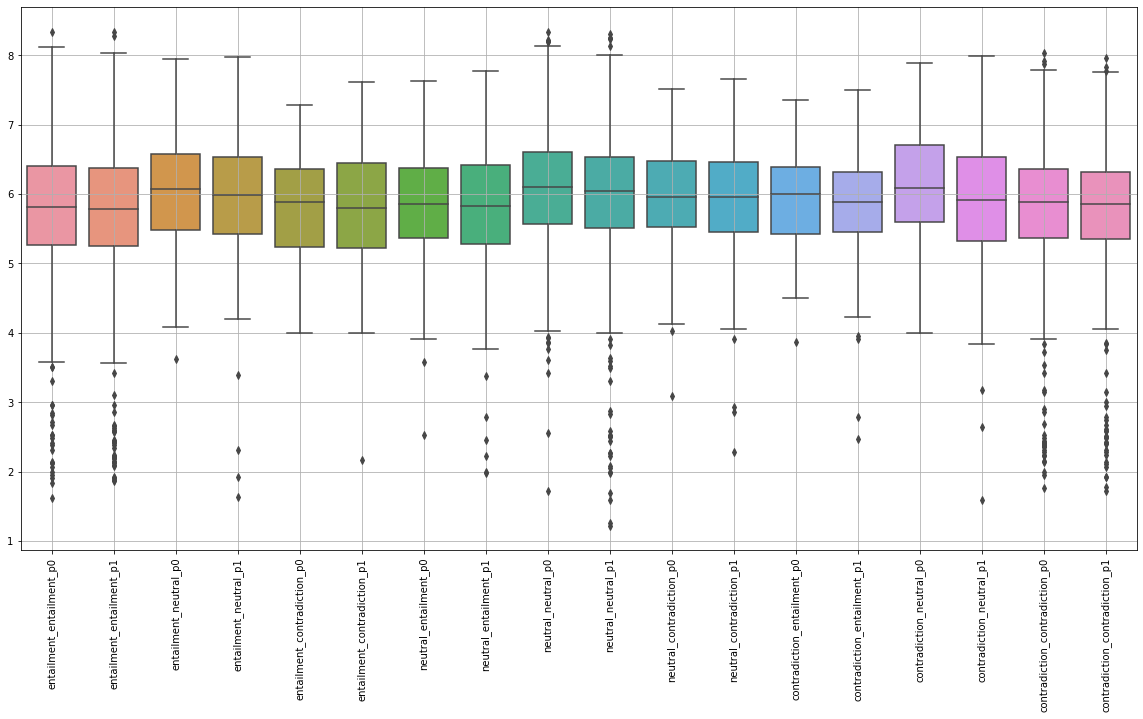

In [95]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(18),lista_xs,rotation=90)

In [96]:
valores_labels=[]
for el in labels:
    a=dfn[(dfn['E_P']==el) & (dfn['Paraphrase']==0)]
    b=a['entropia'].values[0]
    valores_labels.append(b)
valores_labels

[array([5.94 , 6.091, 5.977, 5.14 , 4.5  , 7.294, 5.934, 4.564, 6.451,
        5.804, 6.497, 5.817, 5.46 , 5.492, 6.522, 4.419, 5.918,   nan,
        6.57 , 7.425,   nan, 6.466, 5.21 , 7.574, 5.707, 5.252, 5.64 ,
        7.299, 6.616, 4.31 , 6.336, 6.39 , 6.426, 5.494, 4.481, 5.898,
        6.533, 6.537, 5.417, 6.971, 6.518, 5.607, 5.682, 5.984, 7.198,
        5.931, 5.561,   nan, 5.521, 5.096, 5.325, 5.874, 6.192, 7.21 ,
        6.503, 6.436, 6.27 , 4.946, 6.768, 6.783, 6.448, 5.011, 5.856,
        5.059, 6.467, 4.562, 7.405, 5.258, 4.322, 5.325, 4.297, 5.346,
        5.831, 5.202, 5.422, 6.088, 7.395, 5.65 , 6.28 , 4.938, 7.412,
        4.948, 7.061, 5.08 , 4.822, 6.966, 5.57 , 7.204, 5.793, 6.366,
        5.935, 5.715, 6.32 , 5.771, 5.49 , 5.323, 7.324, 6.016, 5.072,
        5.103, 5.527, 7.017, 6.39 , 5.114, 6.627, 6.655, 5.719, 4.927,
        5.477, 5.488, 4.44 , 5.76 , 5.846, 5.322, 6.765, 4.107, 5.692,
        6.63 , 6.749, 5.833, 5.494, 5.114, 5.392, 6.745, 6.415, 5.559,
      

In [97]:
len(valores_labels)

9

([<matplotlib.axis.XTick at 0x7f672c4c5ac0>,
 [Text(0, 0, 'ent_ent'),
  Text(1, 0, 'ent_neu'),
  Text(2, 0, 'ent_cont'),
  Text(3, 0, 'neu_ent'),
  Text(4, 0, 'neu_neu'),
  Text(5, 0, 'neu_cont'),
  Text(6, 0, 'cont_ent'),
  Text(7, 0, 'cont_neu'),
  Text(8, 0, 'cont_cont')])

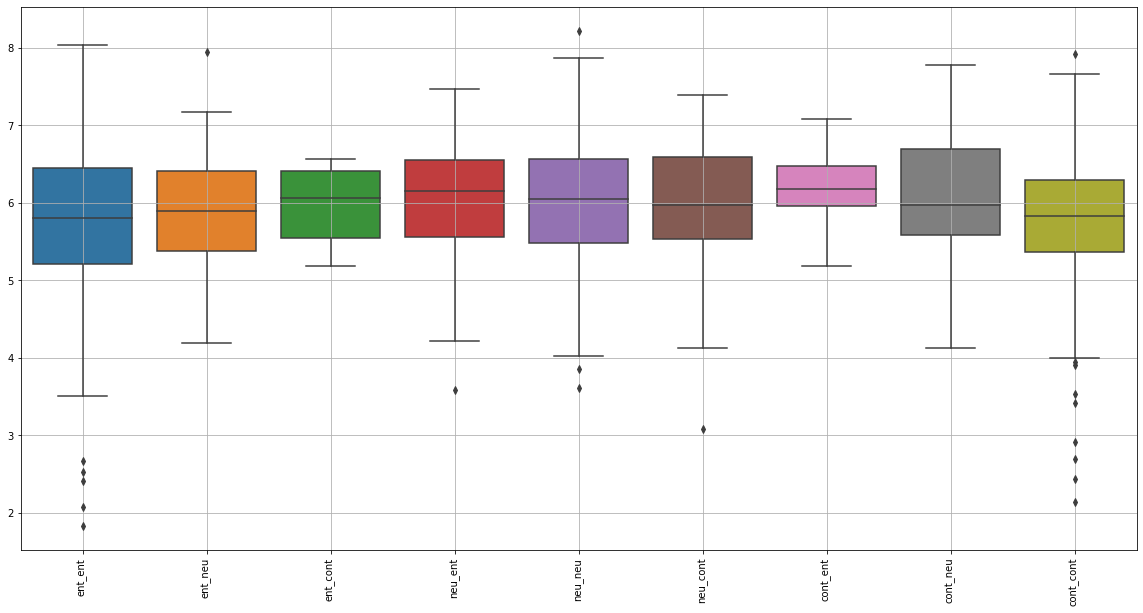

In [98]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(9),labels_formato,rotation=90)

# Procesamiento para generar boxplot por muestreos

In [99]:
l_grupos=dfn.grupo.unique()
labels_g=[]
datos_g=[]
grupo_g=[]
for lg in l_grupos:
    for lab in labels:
        l_mean_entropia=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==0)]
        for index,strings in temp.iterrows():
            l_mean_entropia.append(np.nanmean(strings['entropia']))
        labels_g.append(lab)
        datos_g.append(l_mean_entropia[:])
        l_mean_entropia.clear()
        grupo_g.append(lg)

/tmp/ipykernel_137714/654303805.py:10: RuntimeWarning: Mean of empty slice
  l_mean_entropia.append(np.nanmean(strings['entropia']))


In [100]:
l_grupos_p=dfn.grupo.unique()
labels_g_p=[]
datos_g_p=[]
grupo_g_p=[]
for lg in l_grupos_p:
    for lab in labels:
        l_mean_entropia_p=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==1)]
        for index,strings in temp.iterrows():
            l_mean_entropia_p.append(np.nanmean(strings['entropia']))
        labels_g_p.append(lab)
        datos_g_p.append(l_mean_entropia_p[:])
        l_mean_entropia_p.clear()
        grupo_g_p.append(lg)

In [101]:
len(grupo_g)

63

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

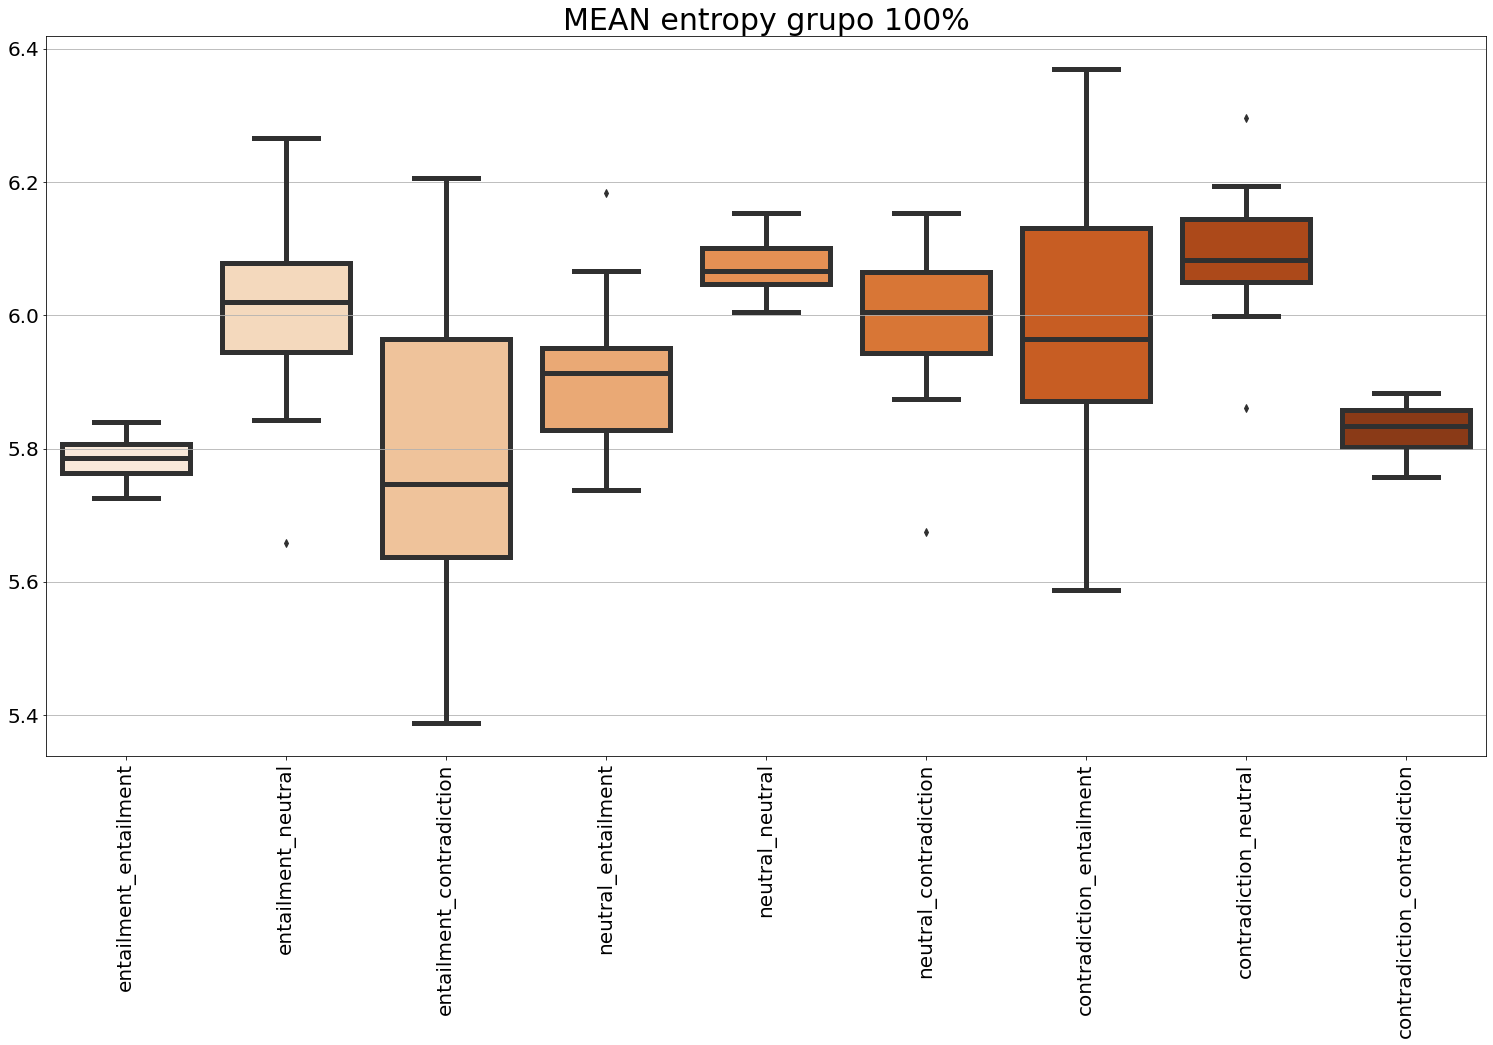

In [102]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 100%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[:9],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[:9],fontsize=20,rotation=90)


[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

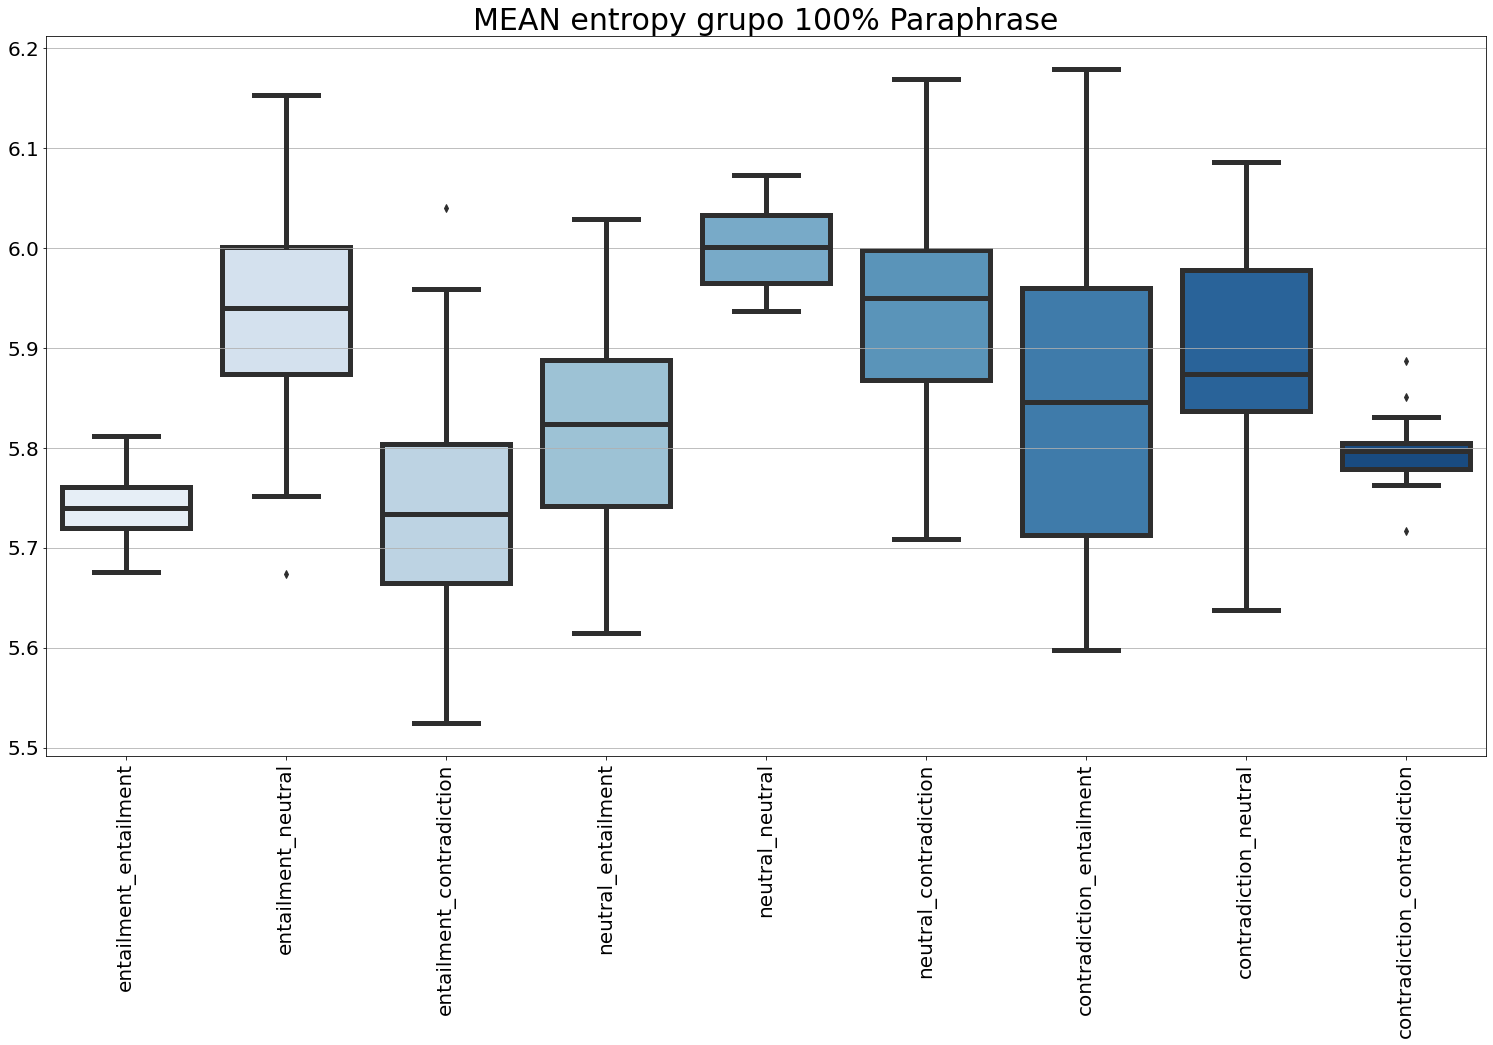

In [103]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 100% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[:9],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[:9],fontsize=20,rotation=90)


[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

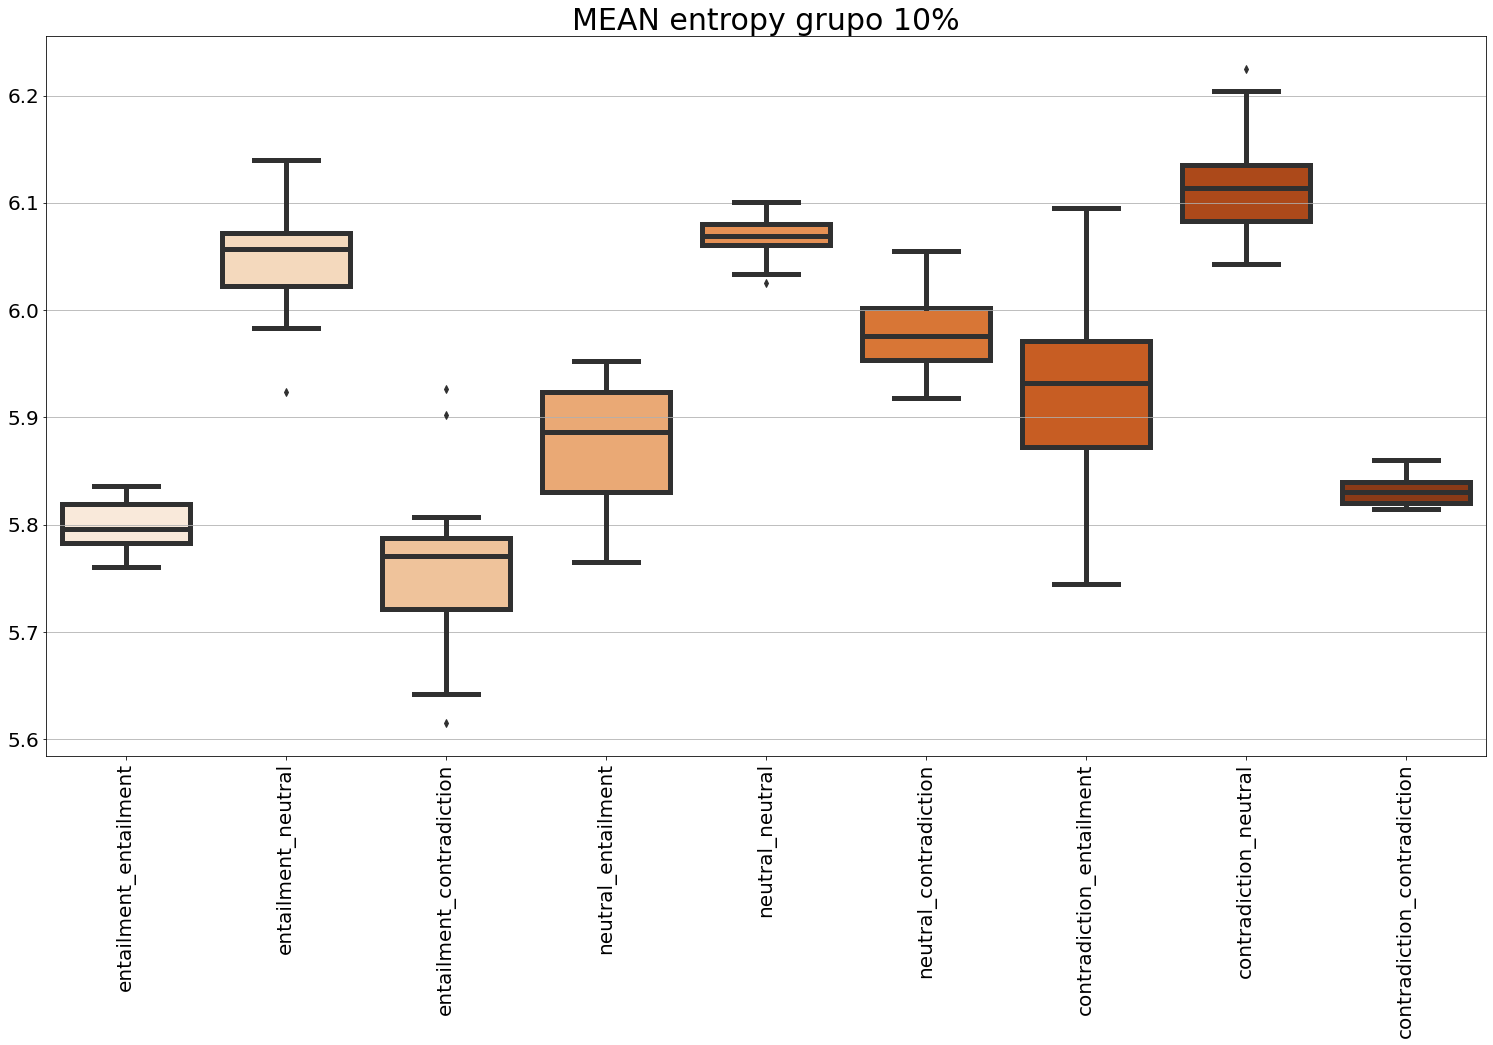

In [104]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 10%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[9:18],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[9:18],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

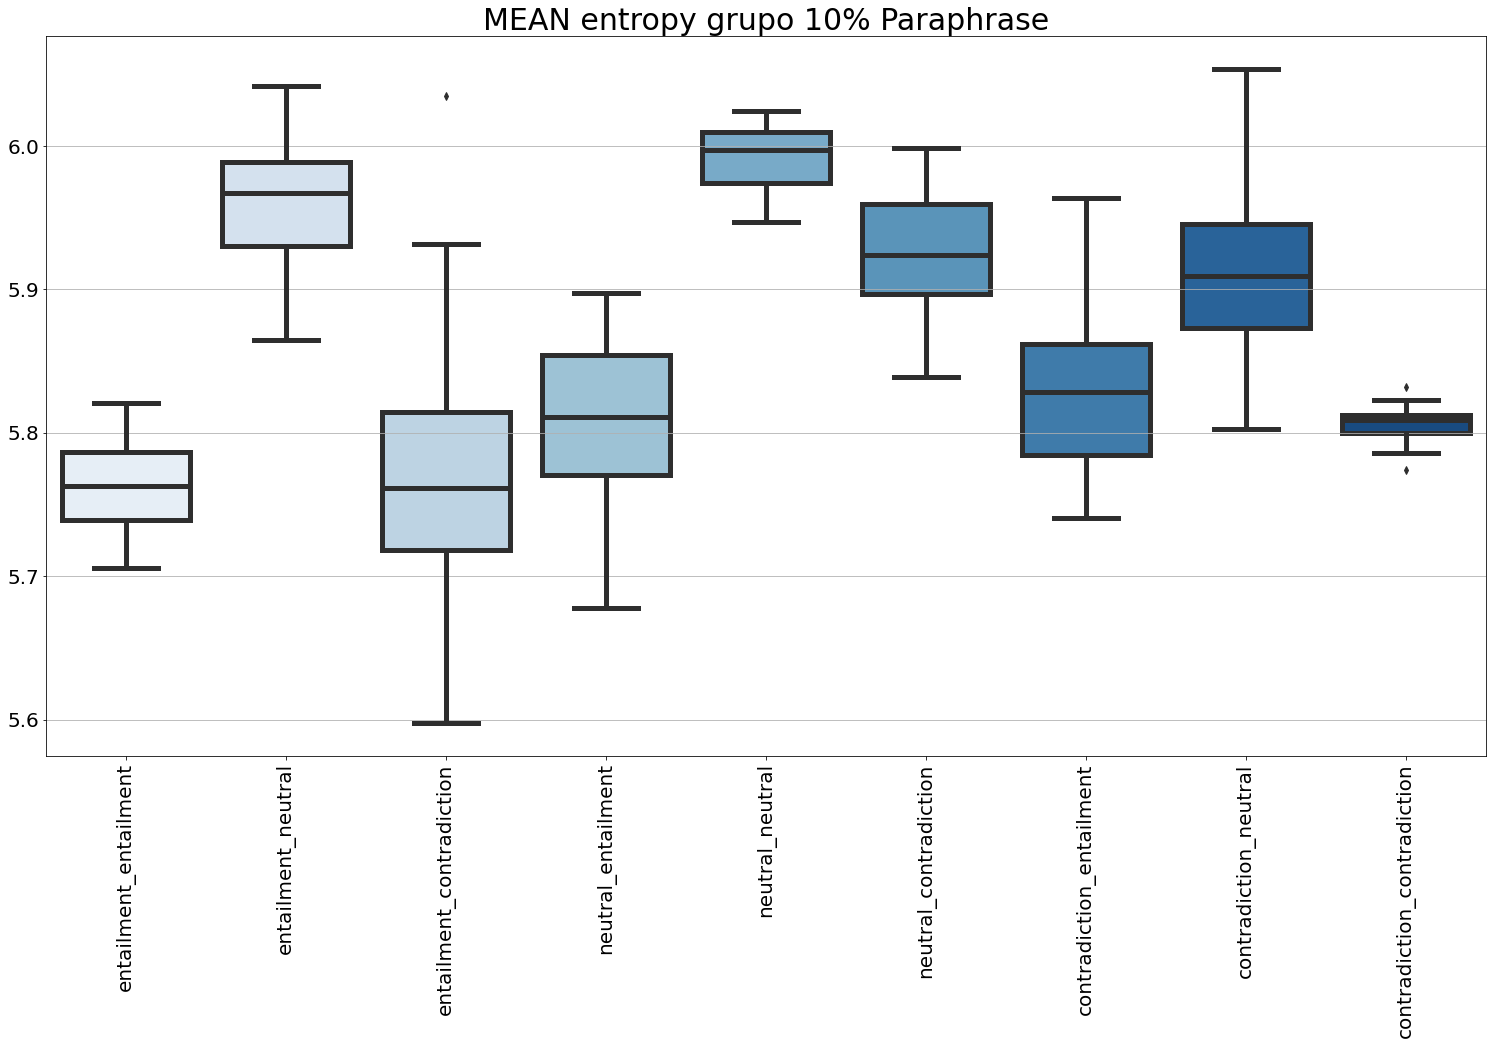

In [32]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 10% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[9:18],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[9:18],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

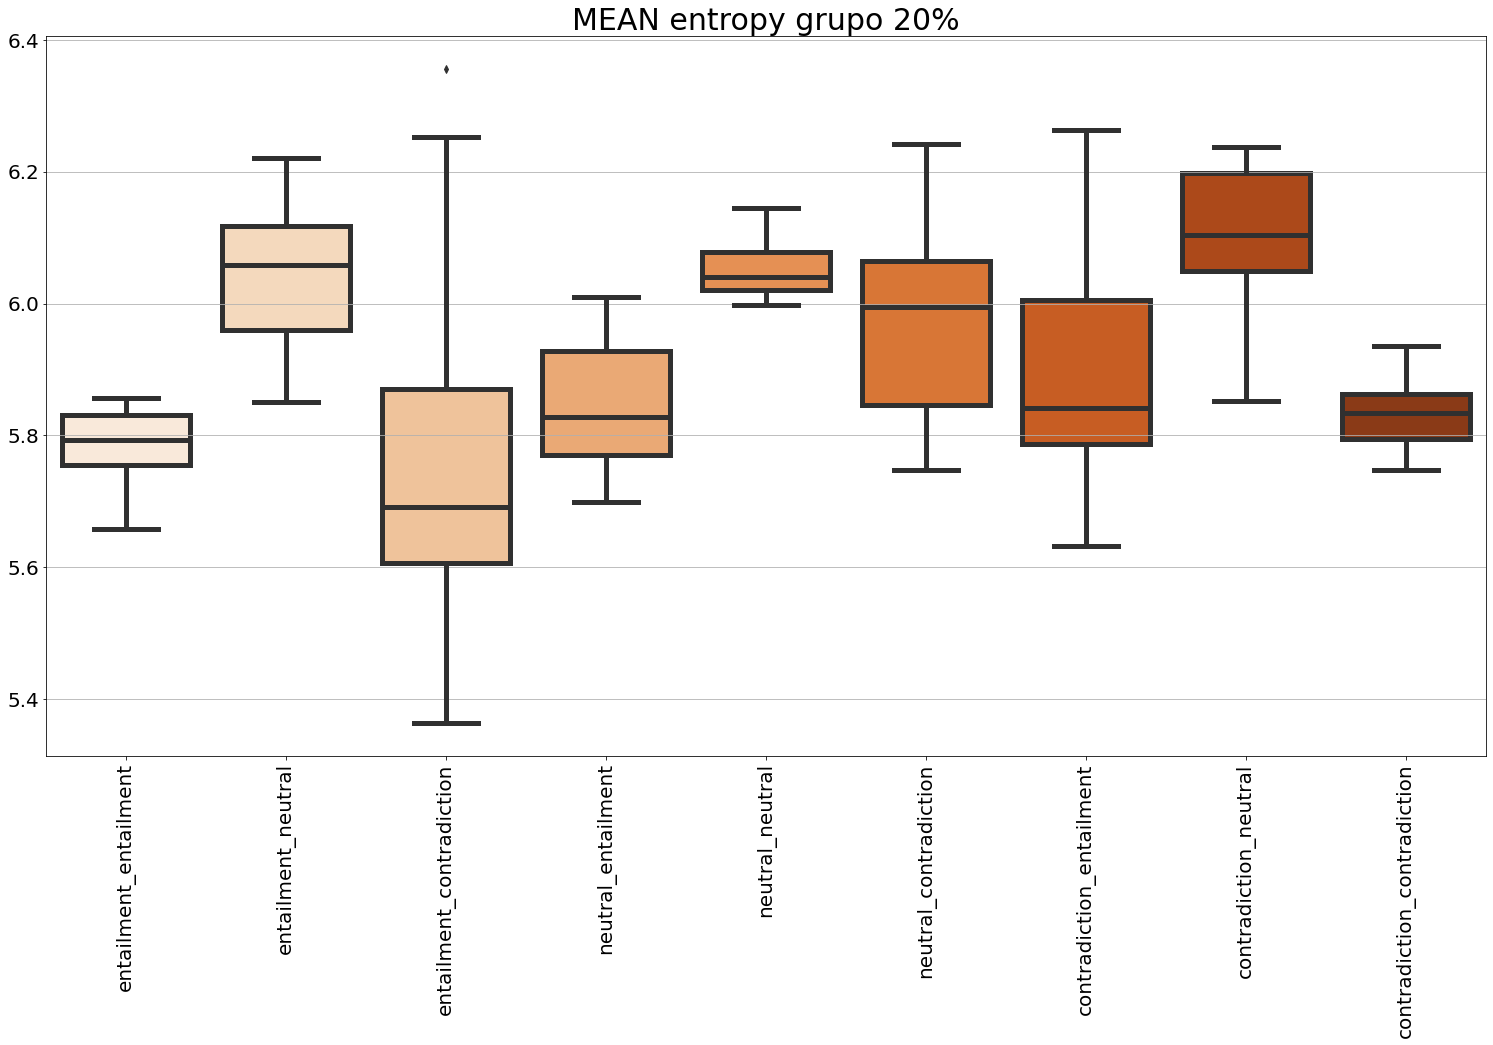

In [33]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 20%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[18:27],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[18:27],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

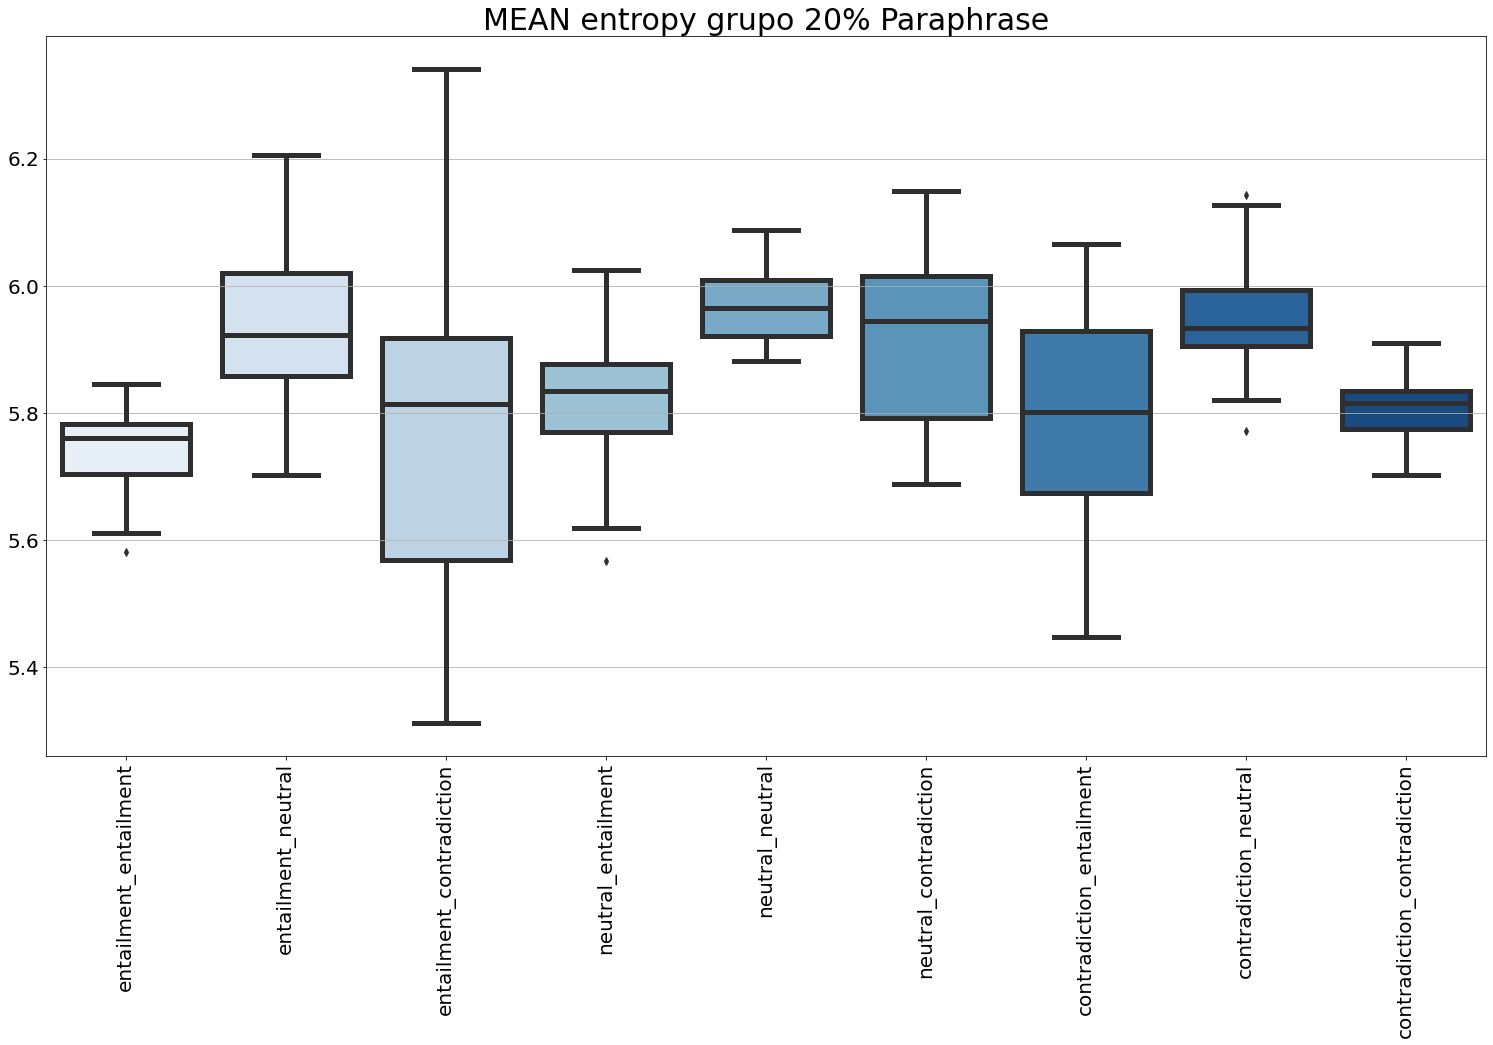

In [34]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 20% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[18:27],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[18:27],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

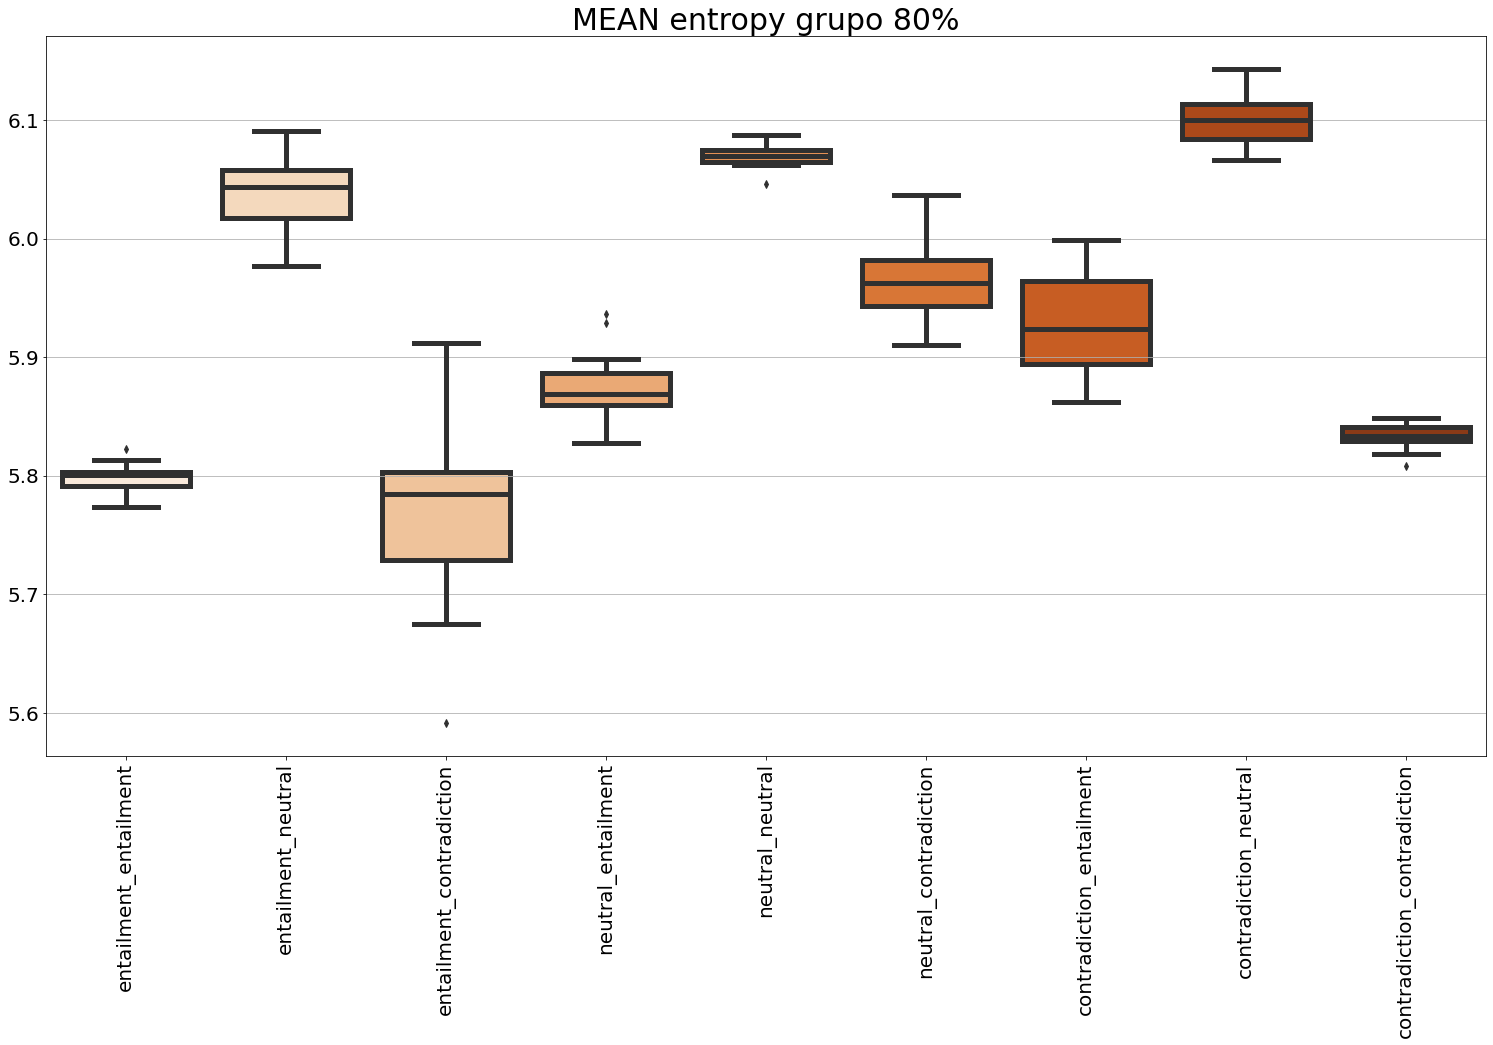

In [35]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 80%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[27:36],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[27:36],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

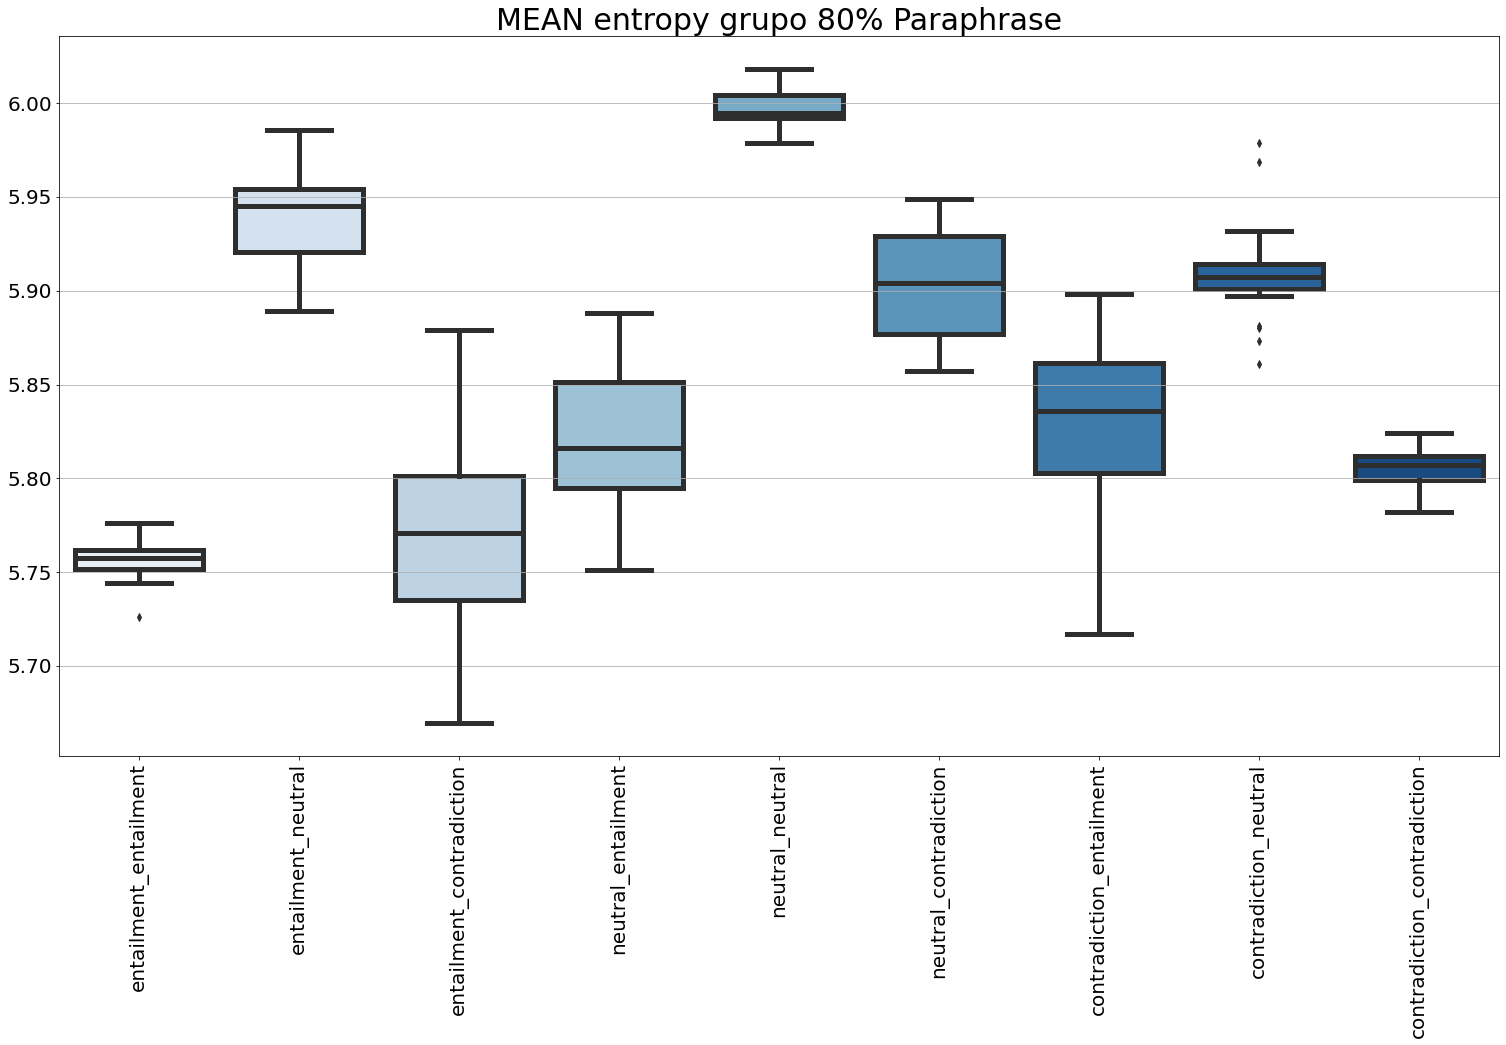

In [36]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 80% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[27:36],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[27:36],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

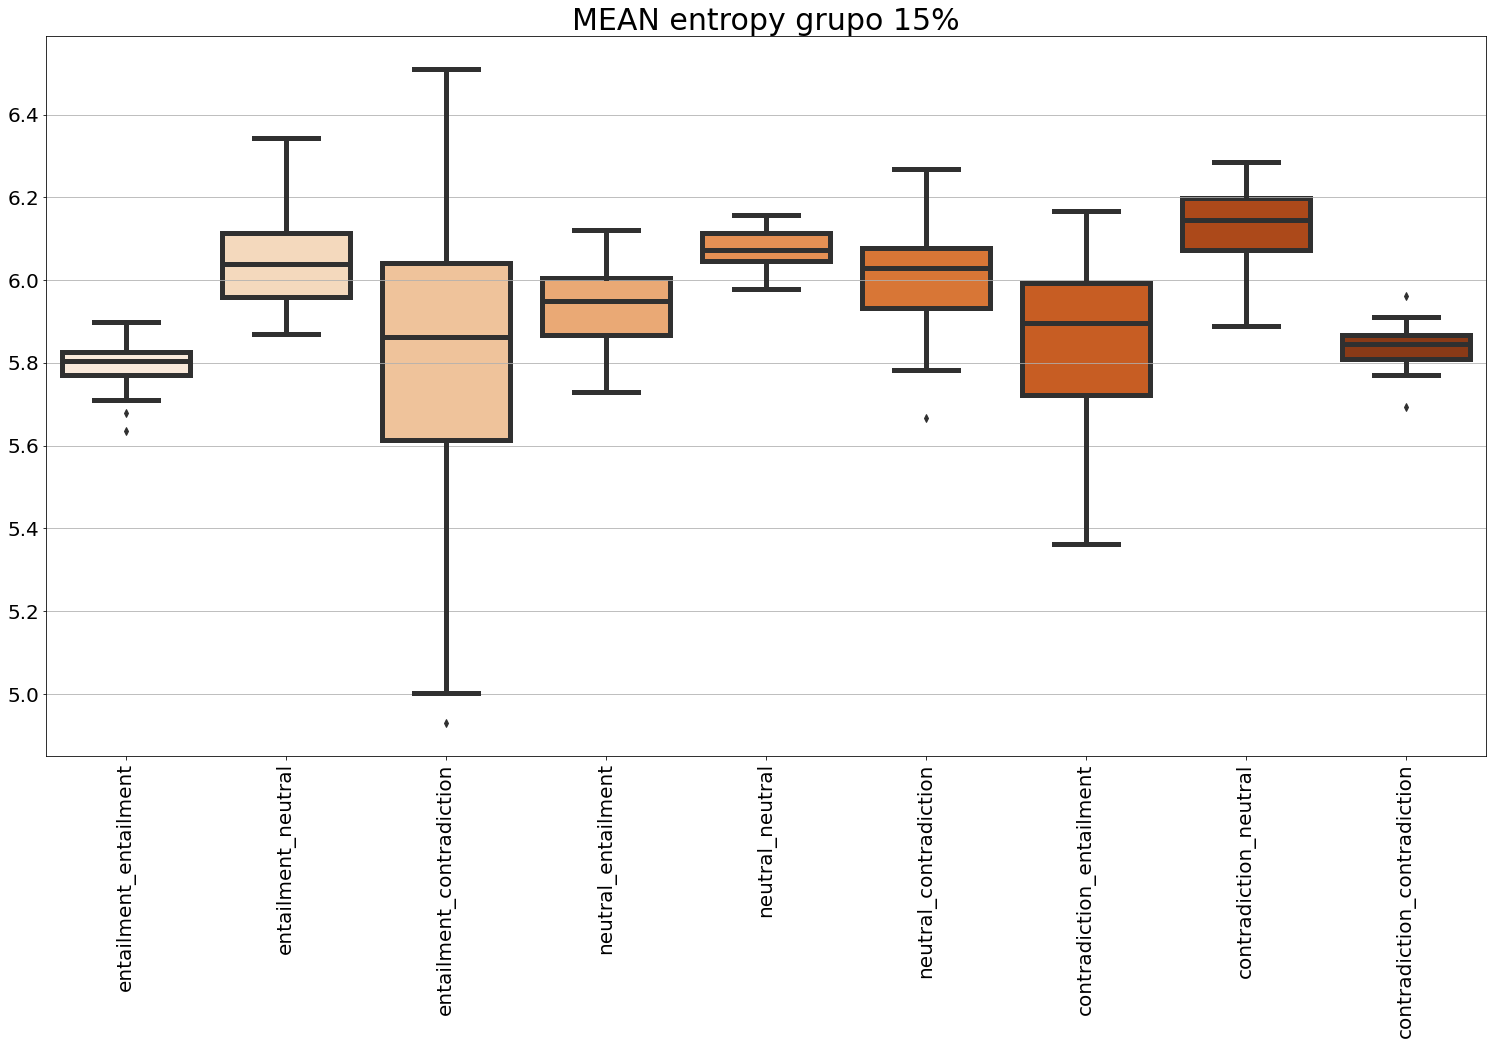

In [37]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 15%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[36:45],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[36:45],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

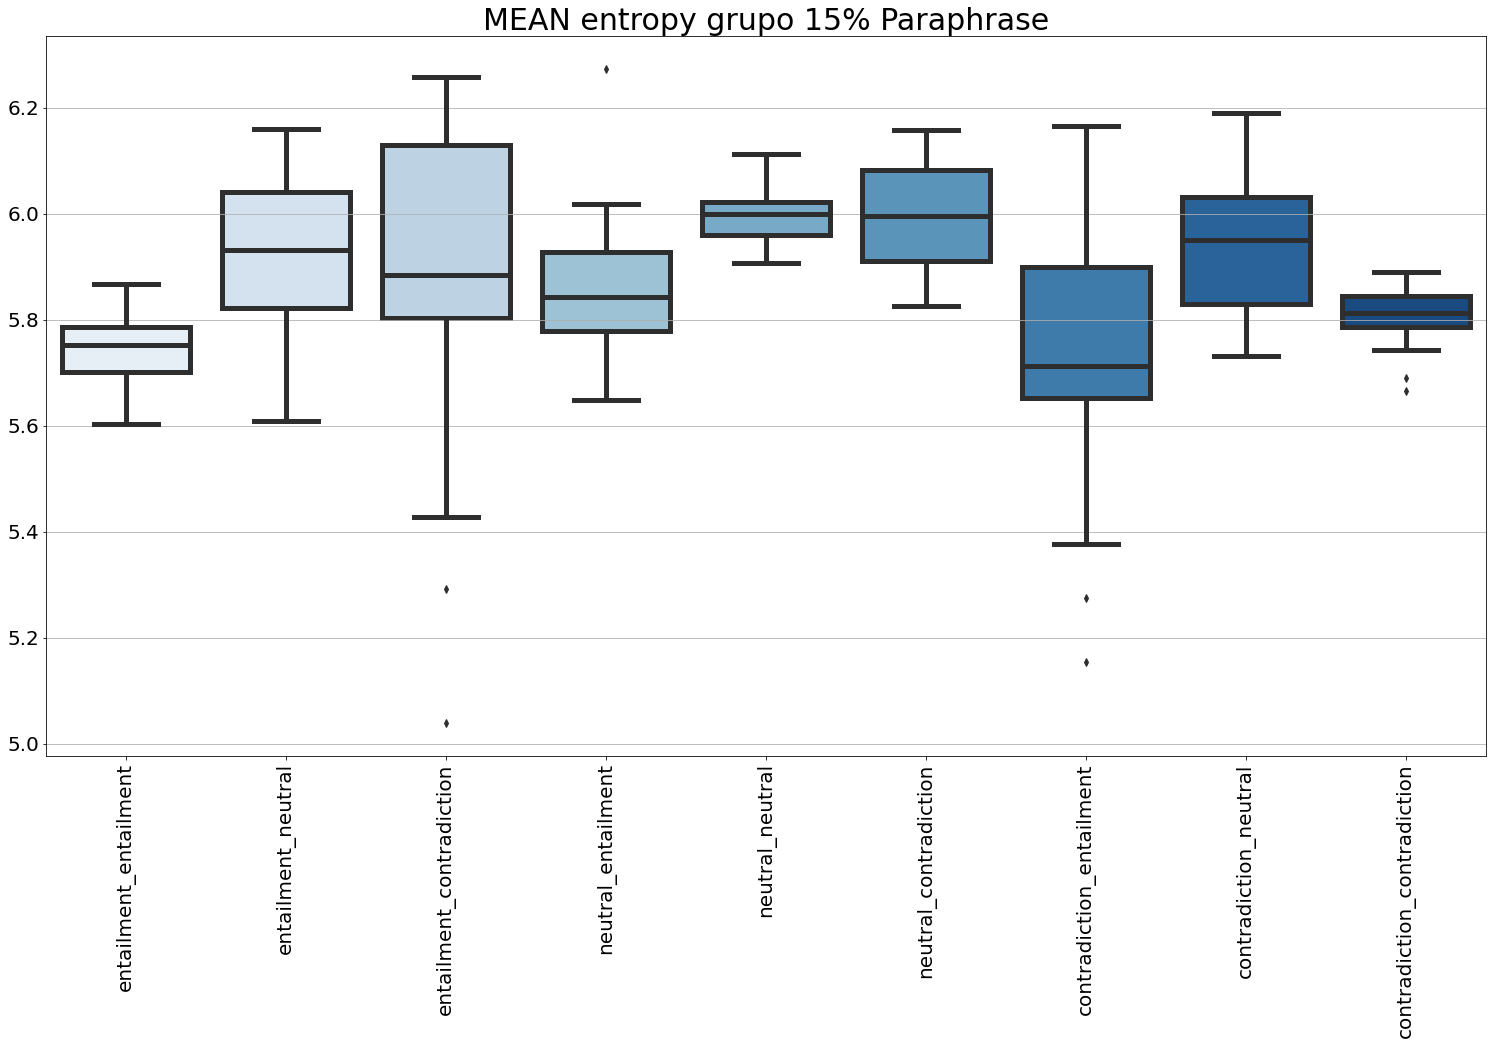

In [38]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 15% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[36:45],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[36:45],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

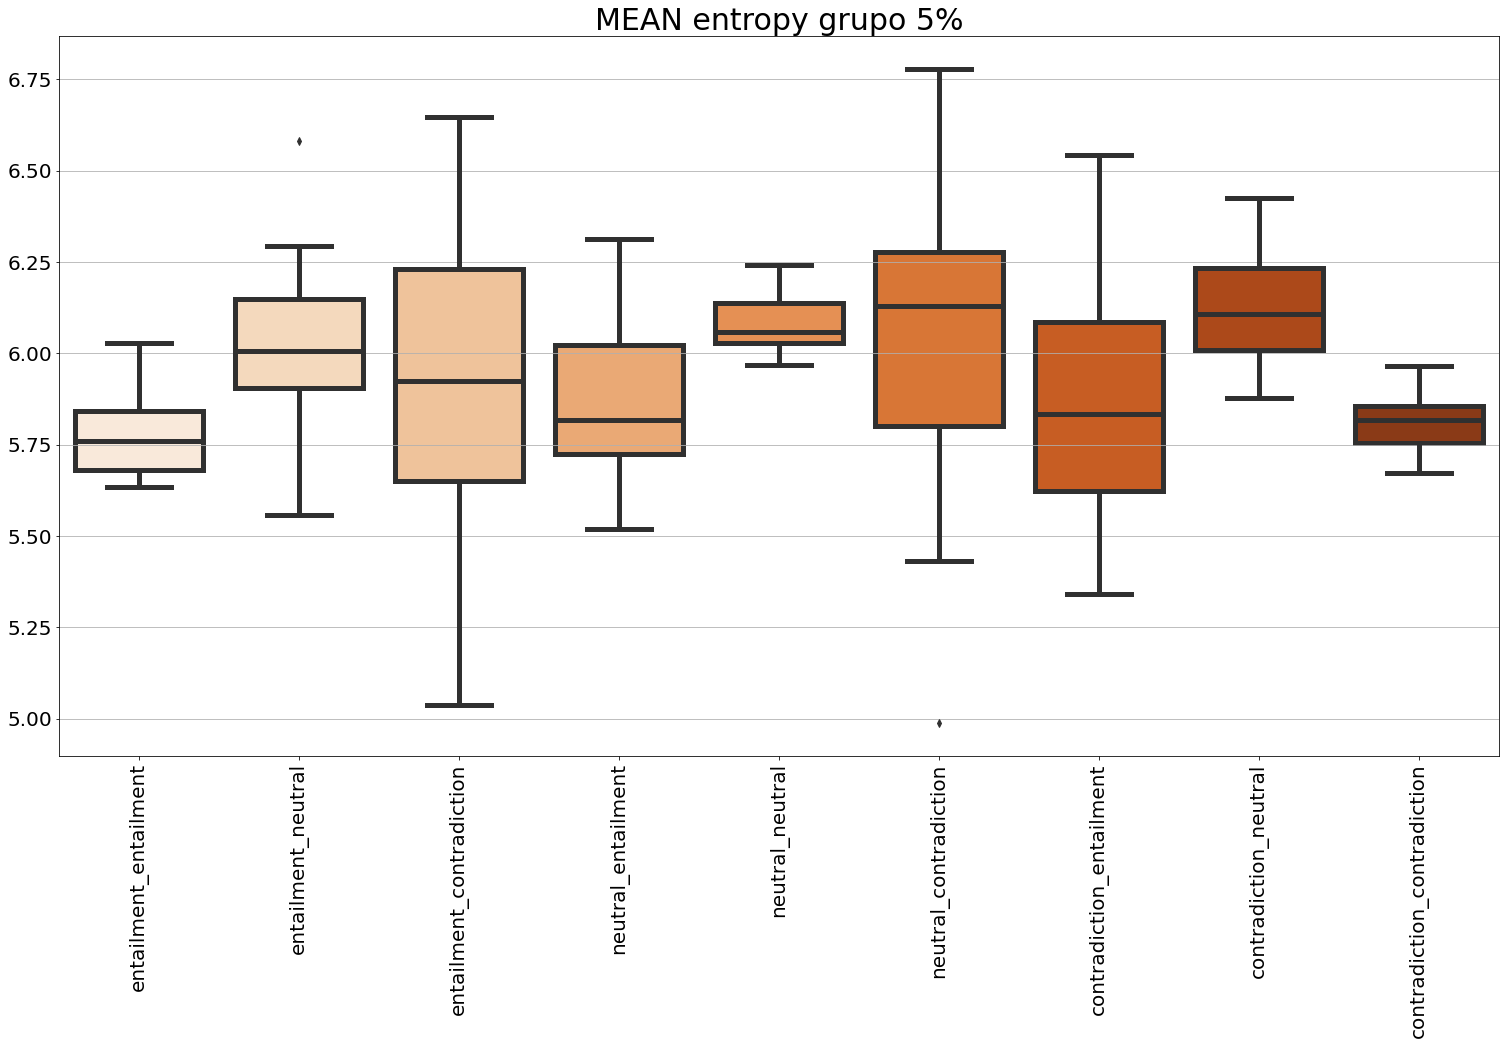

In [39]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 5%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[45:54],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[45:54],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

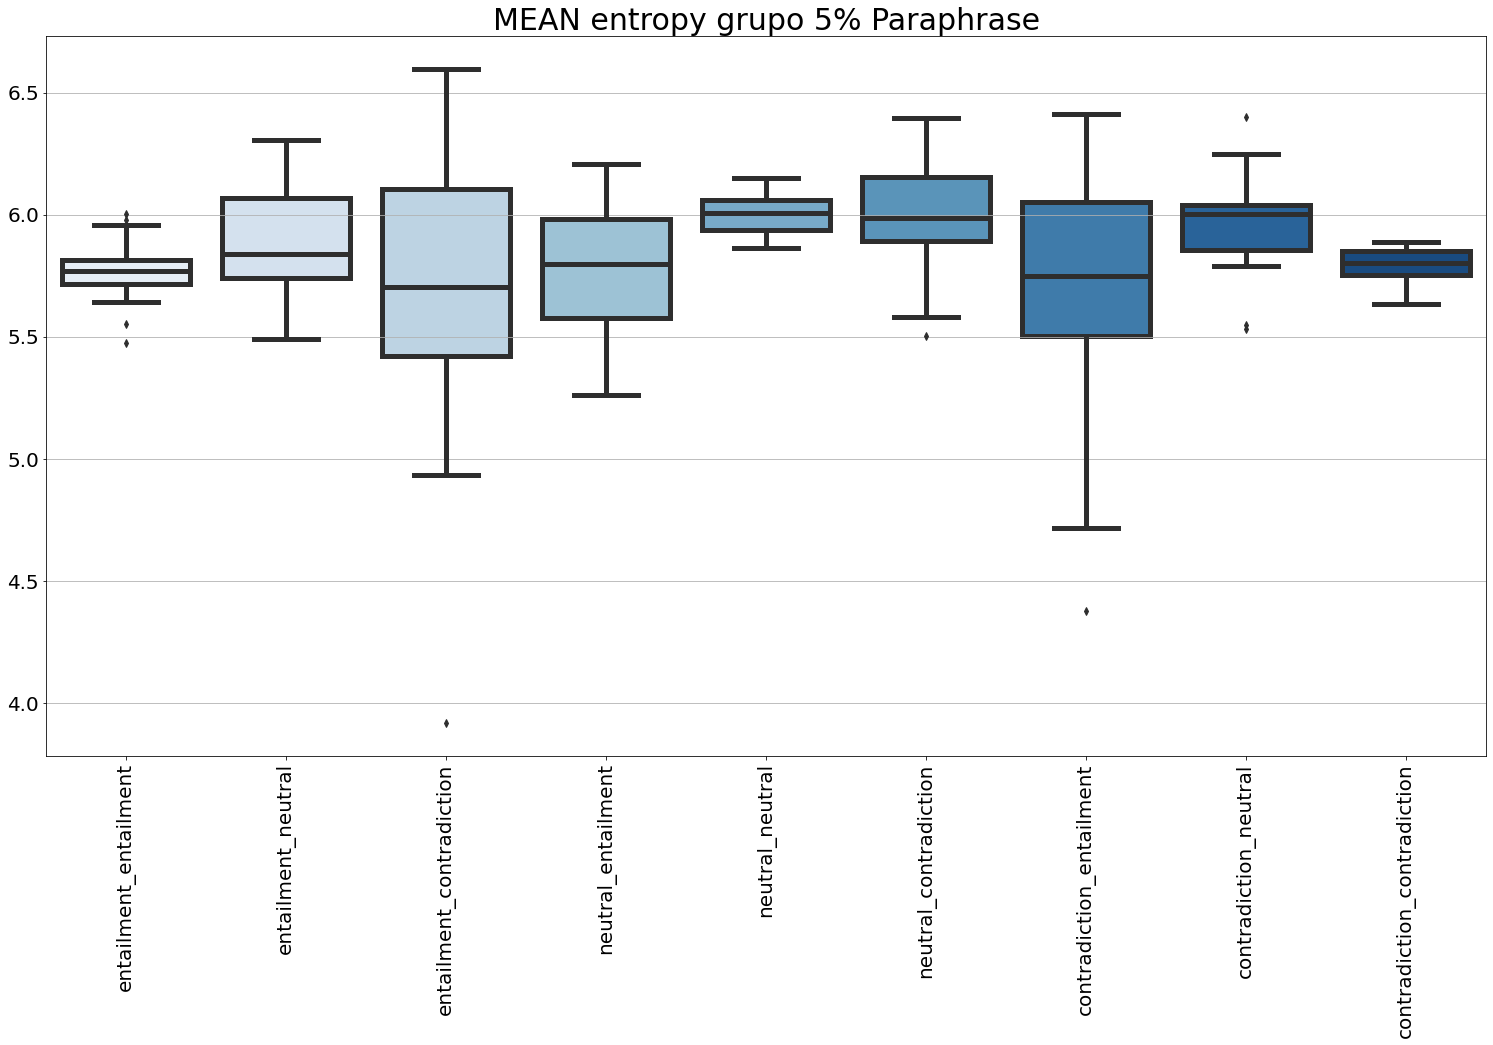

In [40]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 5% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[45:54],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[45:54],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

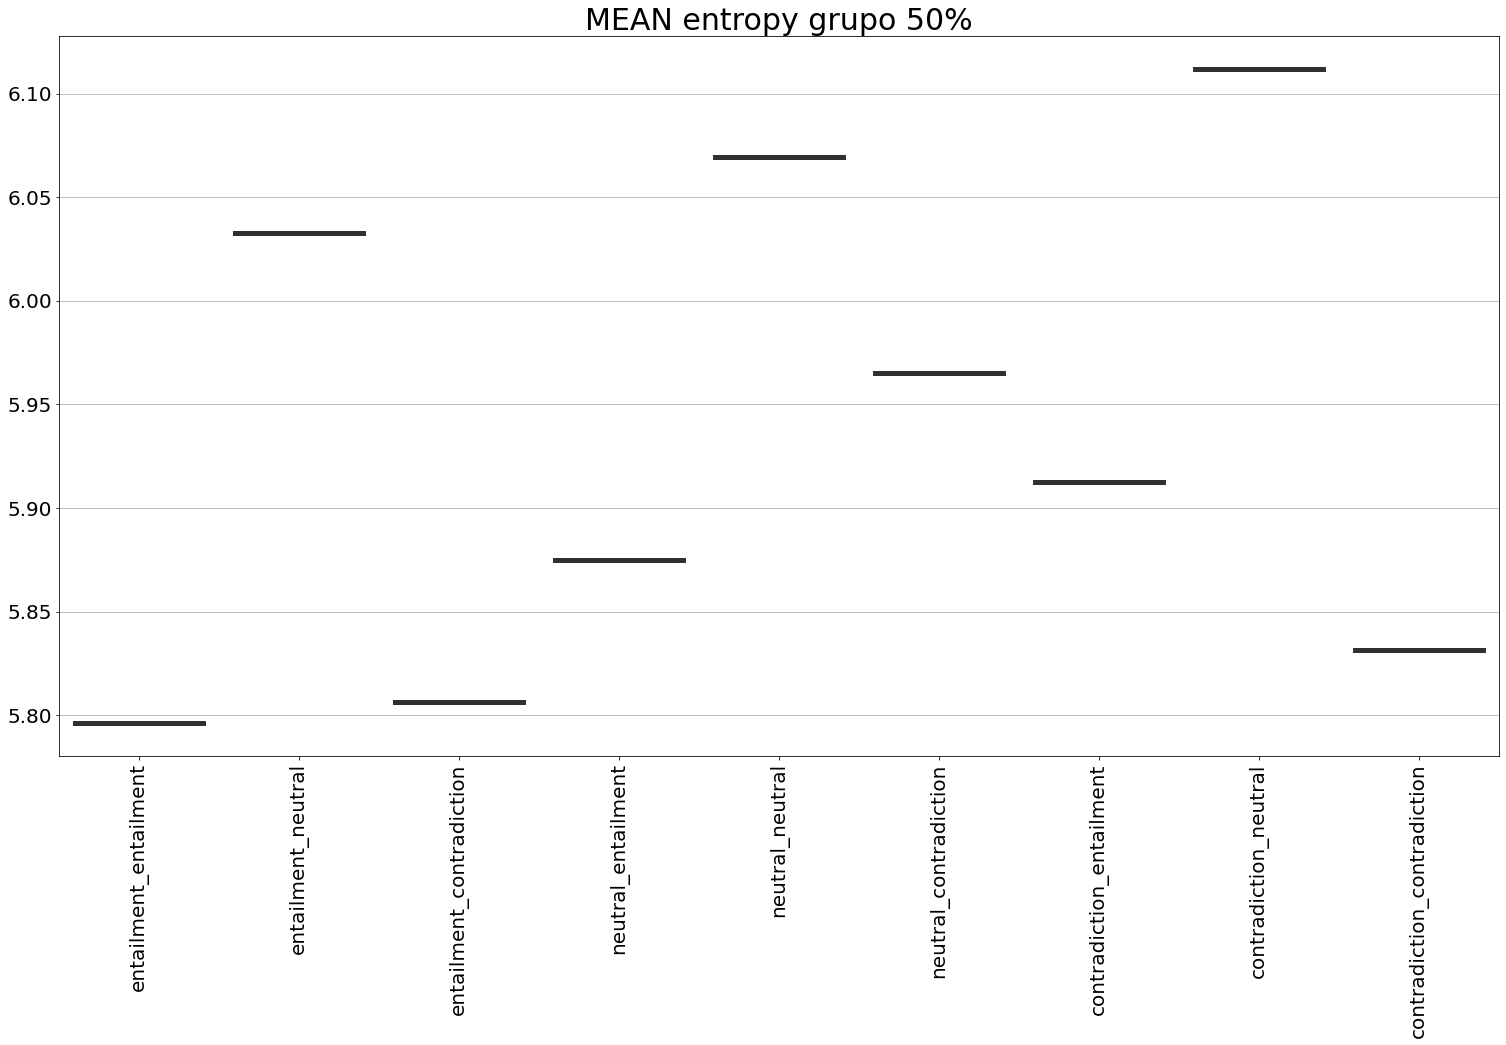

In [41]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 50%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[54:63],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[54:63],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

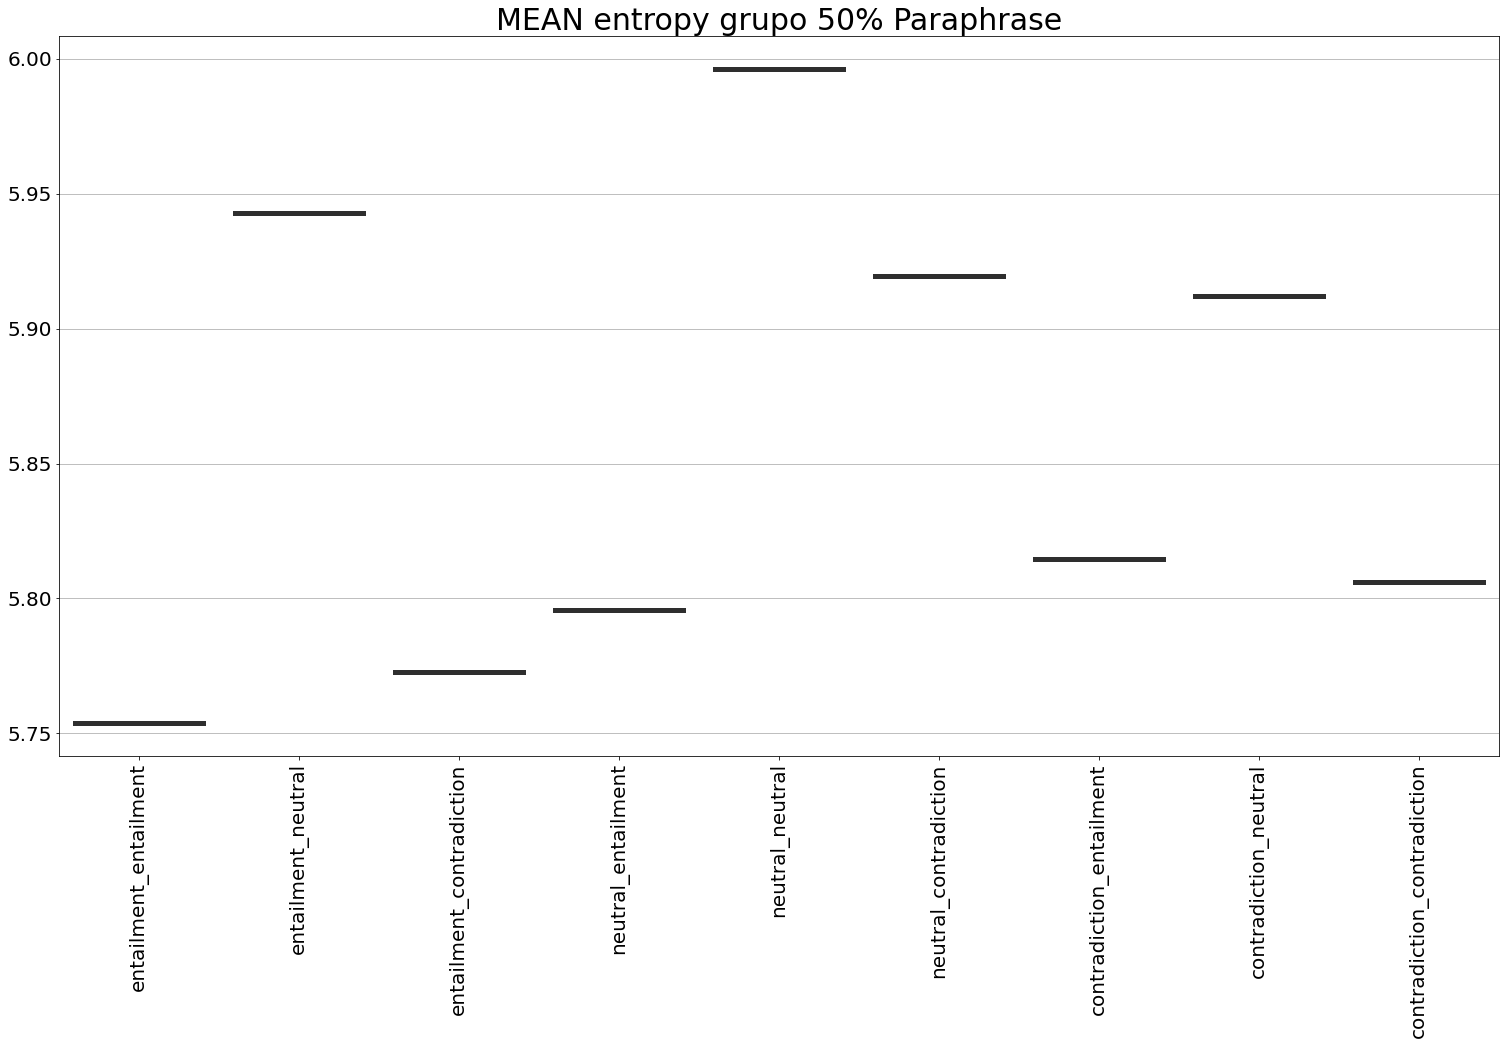

In [42]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 50% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[54:63],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[54:63],fontsize=20,rotation=90)